# CAR INSURANCE COLD CALLS - REPORT

<img style="float: left;" src="giphy.gif">

### ABOUT THE DATASET
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
This is a dataset from a bank in the United States. Besides usual services, this bank also provides carinsurance services. The bank organizes regular campaigns to attract new clients.The bank has potential customers data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns(attributes like previous attempts, outcome).
</span>

<img style="float: left;" src="problems.gif">

### CLIENT
STAR Bank is our Client, located in United States they operate in almost all states and they try to convert already existing insurance customers from a different agency to STAR by their marketing campaigns mostly ***Cold Call***

### PROBLEM(S) TO SOLVE
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
The client wants to know the most important factor which determines cold call success so that they can work on it and further improve their business using the cold call data.The problem I am trying to solve involves creating predictive models and choosing the best model among them using model validation techniques to gain more insights about the key factors which contributes to cold call success and provide recommendations to improve cold call success as well. Further the model implementation can improve their business and help them on concentarting on the key areas to their success</span>

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Lets look at the features of the dataset and understand what each attribute/feature is about.The table below shows a brief description of the dataset and whether the variables are continuous, categorical or binary.</span>

|Feature          | Description                                                           | Example                            |
|:----------------|:----------------------------------------------------------------------|:-----------------------------------|
|Id               | Unique ID number. Predictions file should contain this feature.       |“1” … “5000”                        |
|Age              | Age of the client                                                     |                                    |
|Job              | Job of the client.                                                    | "admin.", "blue-collar", etc.      |
|Marital          | Marital status of the client                                          | "divorced", "married", "single"    |
|Education        | Education level of the client                                         | "primary", "secondary", etc.       |
|Default          | Has credit in default?                                                | "yes" - 1,"no" - 0                 |
|Balance          | Average yearly balance, in USD                                        |                                    |
|HHInsurance      | Is household insured                                                  | "yes" - 1,"no" - 0                 |
|CarLoan          | Has the client a car loan                                             | "yes" - 1,"no" - 0                 | 
|Communication    | Contact communication type                                            | "cellular", "telephone", “NA”      |
|LastContactMonth | Month of the last contact                                             | "jan", "feb", etc.                 |
|LastContactDay   | Day of the last contact                                               |                                    |
|CallStart        | Start time of the last call (HH:MM:SS)                                |  12:43:15                          |
|CallEnd          | End time of the last call (HH:MM:SS)                                  | 12:43:15                           |
|NoOfContacts     | Number of contacts performed uring this campaign for this client      |                                    |
|DaysPassed       |  Number of days that passed by after the client was last contacted    |                                    |
|                 |   from a previous campaign (numeric; -1 means client was not          |                                    |
|                 |   previously contacted)                                               |                                    |
|PrevAttempts     | Number of contacts performed before this campaign and for this client |                                    |
|Outcome          | Outcome of the previous marketing campaign                            | "failure", "other", "success", “NA”|
|CarInsurance     | Has the client subscribed a CarInsurance?                             | "yes" - 1,"no" - 0                 |

<img style="float: left;" src="wrangle.gif">

### DATA WRANGLING / DATA MUNGING

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Data Wrangling or Data Munging is the process of converting data from one form to another to better understand it. Here in our case our data is availabe to us as a CSV file and lets use our powerful python data science libraries to load it into a dataframe. Well I never thought it would look so easy !!</span>

In [2]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Here indexing already existing column saves a lot of time and hassle. Trust me</span>

In [3]:
# Reading Csv file
df = pd.read_csv('carInsurance_train.csv',index_col = 'Id')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Sneak peek into our top 5 rows of the dataframe. Well, our data looks too good </span>

In [4]:
# Top rows
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


<img style="float: left;" src = "explore.gif">

### EXPLORATORY DATA ANALYSIS

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Exploring is always fun and the new insights you can find is always interesting. Starting from the shape of the dataset to knowing about the columns, datatypes and the statistics part of it gives us a lot more of understanding and deep dive into the data. By having a look at the Balance amount in our dataset 75% of the field is 1619 and the max is 98417. Nice, we are exploring !! </span>

In [5]:
# Shape of dataframe
df.shape

(4000, 18)

In [6]:
# Columns in dataset
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> Looking at our Numerical columns Default, HHInsurance, CarLoan,CarInsurance are binary having 0's' and 1's'</span>

In [7]:
# Statistics of numerical columns
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [8]:
# Datatypes of columns in dataset
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [9]:
# Statistics of categorical features
df.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,10:42:44,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


<img style="float: left;" src = "outlier.gif">

### OUTLIER ANALYSIS
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;"> An Outlier is usually an observation which typically lies farthest from the mean. According to Statistical theory if any observation is 3*IQR(Inter Quartile Range) from the mean then its called an Outlier. Sometimes values are distributed randomly such as a Balance amount - from our boxplot below looks like more values have crossed the whisker. One particular data point is too far when compared to the other points in the data and the outlier is dropped from the dataset. 

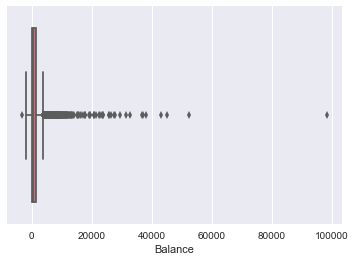

In [10]:
# Plotting Balance field as a Boxplot using Seaborn
sns.boxplot(x='Balance',data=df,palette='hls');

In [11]:
# Maximum value in Balance field
df.Balance.max()

98417

In [12]:
# Looking at the particular maximum value in the dataframe
df[df['Balance'] == 98417]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [13]:
# Dropping the index value corresponding to the outlier
df_new = df.drop(df.index[1742]);

<img style="float: left;" src = "missing.gif">

### HANDLING MISSING VALUES
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  Missing values are a major concern with data analysis and dealing them is another hurdle. Python treats missing data as NaN but doesnot include it into calcualtions and visulizations. Also predictive models cannot be built without treating missing values. In our case missing values occurs mostly in Outcome and Communication fields. Job and Education have considerable amount of missing values.</span>
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  

**IMPUTING MISSING VALUES**
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
The missing values like Job and Education are very few and can imputed using backfill/frontfill pad method in python .Outcome and Communication have quite a lot missing values and hence they are imputed using None for NaN values.
</span>

In [14]:
#checking for missing values using isnull() method
df_new.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [15]:
# Using frontfill to fill the missing values in Job and Education fields
df_new['Job'] = df_new['Job'].fillna(method ='pad')
df_new['Education'] = df_new['Education'].fillna(method ='pad')

In [16]:
# Using none to fill Nan values in Communication and Outcome fields
df_new['Communication'] = df_new['Communication'].fillna('none')
df_new['Outcome'] = df_new['Outcome'].fillna('none')

In [17]:
#Looks like all missing values have been imputed
df_new.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

<img style="float: left;" src = "corr.gif">

### CORRELATION
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
Correlation is used to determine the relationship between two variables/ fields. Correlation varies from -1 to 1; if the Correlation is 1 then the fields are positively correlated, 0 having no correlation and -1 is negatively correlated. Lets see how each atttribute correlates with one another using Heatmap. Looks like there is not much of a correlation among variables but DaysPassed and PrevAttempts have a positive Correlation with each other.
</span>

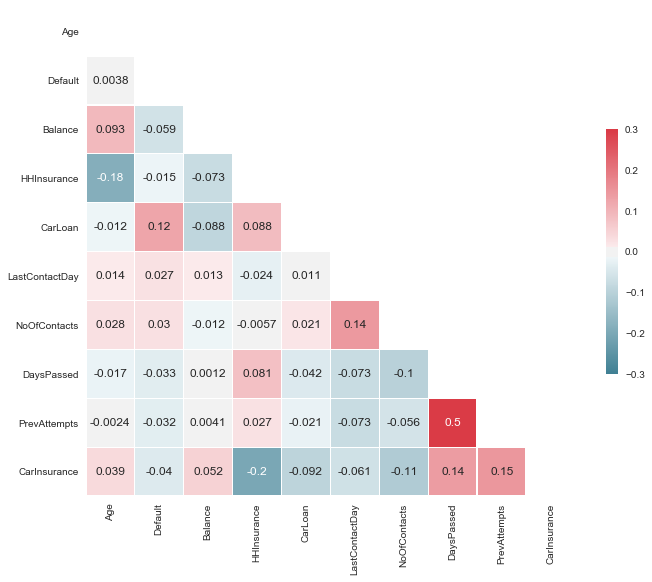

In [18]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
sns.set(style="white")
corr = df_new.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### INFERENTIAL STATISTICS

**One-Sample T-Test**

A one-sample t-test checks whether the sample differs from the population mean. Since the Balance has a
positive correlation with CarInsurance lets see if the Balance has considerable effect on the Target varaible using our test.

**Hypothesis Testing:** Does Balance play a significant role for people opting for CarInsurance(Target)

**Null Hypothesis:** (H0: pTS = pES) The null hypothesis would be that Balance doesnt play a Significant role

**Alternate Hypothesis:** (HA: pTS != pES) The alternative hypothesis would be that there is a significant role played by Balance in determining the CarInsurance(Target)

In [22]:
Balance = df_new['Balance'][df_new['CarInsurance'] == 0].mean()
Balance_influenced = df_new[df_new['CarInsurance']==1]['Balance'].mean()

print( 'The Mean Balance: ' + str(Balance))
print( 'The Mean Balance influenced by the Target: ' + str(Balance_influenced) )

The Mean Balance: 1373.0421711899792
The Mean Balance influenced by the Target: 1711.2817955112218


**Conducting the T-Test**

Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [25]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['CarInsurance']==1]['Balance'],
                  popmean = Balance) 

Ttest_1sampResult(statistic=4.1109699348129309, pvalue=4.139412381903882e-05)

We can see that the p- value is very less and hence the Null Hypothesis can be rejected which means that the alternate hypothesis is true

**The alternative hypothesis would be that there is a significant role played by Balance in determining the CarInsurance(Target)**